 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [1]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [2]:
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform
                                            )
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = {
    0: 	"T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

100%|██████████| 26421880/26421880 [00:02<00:00, 11019633.03it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207204.04it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3901466.11it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6195775.32it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [3]:
print(f'Количество картинок в train {len(trainset)}')
print(f'Количество картинок в test {len(testset)}')

Количество картинок в train 60000
Количество картинок в test 10000


In [4]:
unique_train = trainset.targets.unique(return_counts=True)
unique_train

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

В train датасете количество объектов разных классов распределено равномерно.

In [5]:
unique_test = testset.targets.unique(return_counts=True)
unique_test

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

В test датасете количество объектов разных классов распределено равномерно.

T-shirt/top


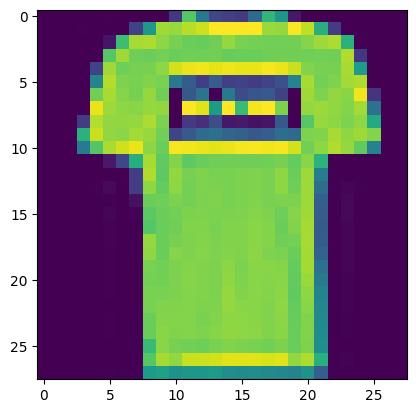

Bag


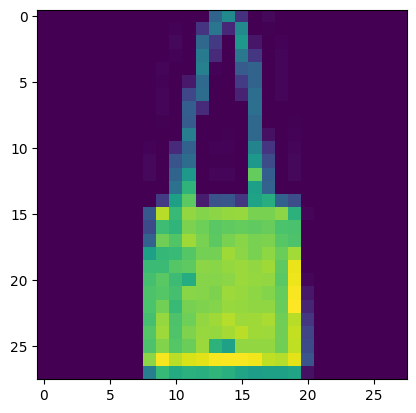

Trouser


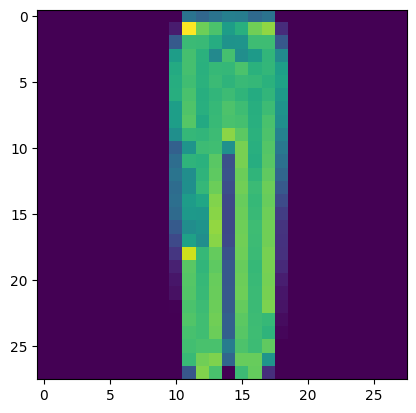

Coat


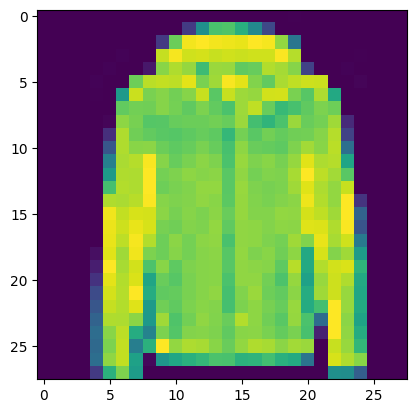

Bag


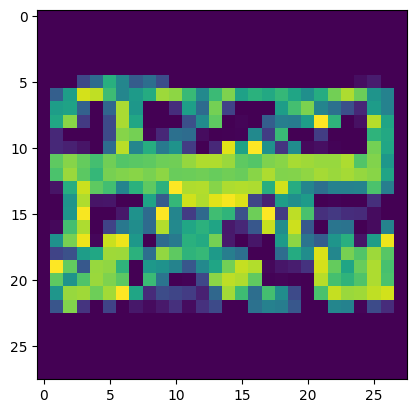

Dress


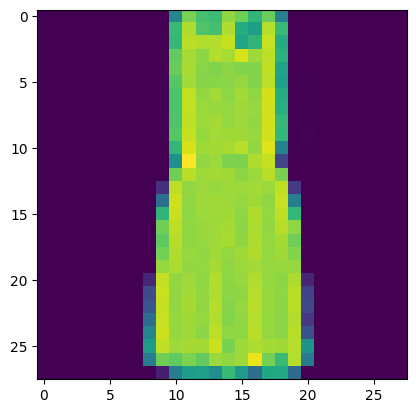

In [6]:
indexes = [1, 200, 1000, 5000, 10000, 30000]

for i in indexes:
  print(classes[trainset.targets[i].item()])
  plt.imshow(trainset.data[i])
  plt.show()

In [7]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer_first = nn.Linear(784, 256)
    self.first_relu = nn.ReLU()
    self.first_dropout = nn.Dropout(0.3)
    self.layer_second = nn.Linear(256, 128)
    self.second_relu = nn.ReLU()
    self.second_dropout = nn.Dropout(0.2)
    self.layer_third = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(-1, 784)
    x = self.layer_first(x)
    x = self.first_relu(x)
    x = self.first_dropout(x)
    x = self.layer_second(x)
    x = self.second_relu(x)
    x = self.second_dropout(x)
    x = self.layer_third(x)
    return x


class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.first_conv = nn.Conv2d(1, 32, 3, padding=1)
    self.relu = nn.ReLU()
    self.droupout = nn.Dropout(0.3)
    self.pool = nn.MaxPool2d(2, 2)
    self.second_conv = nn.Conv2d(32, 64, 3, padding=1)
    self.first_layer = nn.Linear(3136, 128)
    self.second_layer = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(self.relu(self.first_conv(x)))
    x = self.pool(self.relu(self.second_conv(x)))
    x = x.view(-1, 3136)
    x = self.relu(self.droupout(self.first_layer(x)))
    x = self.second_layer(x)
    return x

Epoch 1, Loss: 0.5768362533137932
Epoch 2, Loss: 0.4742092419223161
Epoch 3, Loss: 0.45570048829236404
Epoch 4, Loss: 0.44322457020354217
Epoch 5, Loss: 0.43056394729857417
Epoch 6, Loss: 0.4258204806811913
Epoch 7, Loss: 0.41763736605075935
Epoch 8, Loss: 0.41556928745052163
Epoch 9, Loss: 0.40979202799261594
Epoch 10, Loss: 0.4099554154629444
Accuracy: 0.8622
Epoch 1, Loss: 0.4348171303077345
Epoch 2, Loss: 0.2998552674171744
Epoch 3, Loss: 0.2597113990858079
Epoch 4, Loss: 0.24061574417586615
Epoch 5, Loss: 0.22498445457508406
Epoch 6, Loss: 0.21355853912700687
Epoch 7, Loss: 0.20393602676511385
Epoch 8, Loss: 0.20014518209860124
Epoch 9, Loss: 0.19191916933500194
Epoch 10, Loss: 0.18789203081877956
Accuracy: 0.9127


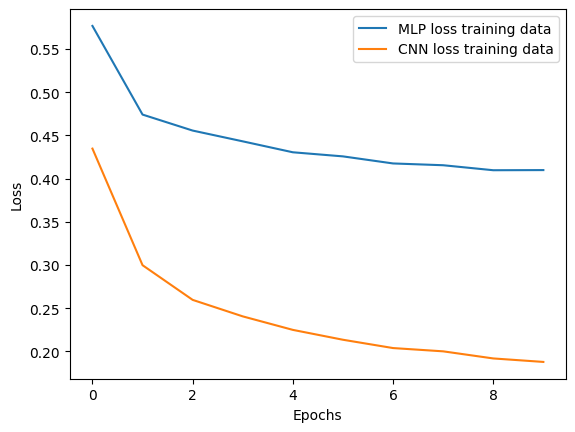

MLP Accuracy: 0.8622
CNN Accuracy: 0.9127


In [10]:
from sklearn.metrics import accuracy_score
from torch.autograd import Variable

def fit(model, trainloader, criterion, optimizer, epochs=5):
  loses = []
  accuracies = []
  for epoch in range(epochs):
    current_loss = 0.0
    for i, all_data in enumerate(trainloader):
      data, labels = all_data
      data = Variable(data.cuda())
      labels = Variable(labels.cuda())
      optimizer.zero_grad()
      outputs = model(data)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      current_loss += loss.item()
    loses.append(current_loss / len(trainloader))
    print(f"Epoch {epoch + 1}, Loss: {current_loss / len(trainloader)}")
  return loses

def report(model, dataloader, criterion):
  model.eval()
  all_labels = []
  all_preds = []
  current_loss = 0.0
  with torch.no_grad():
    for data in dataloader:
      inputs, labels = data
      inputs = Variable(inputs.cuda())
      labels = Variable(labels.cuda())
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      current_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      all_labels.extend(labels.cpu().numpy())
      all_preds.extend(predicted.cpu().numpy())

  accuracy = accuracy_score(all_labels, all_preds)
  print(f"Accuracy: {accuracy}")
  return accuracy


mlp_model = MLP()
mlp_model.cuda()
mlp_model.train()

cnn_model = CNN()
cnn_model.cuda()
cnn_model.train()

mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

mlp_losses = fit(mlp_model, trainloader, criterion, mlp_optimizer, epochs=10)

mlp_accuracy = report(mlp_model, testloader, criterion)

cnn_losses = fit(cnn_model, trainloader, criterion, cnn_optimizer, epochs=10)

cnn_accuracy = report(cnn_model, testloader, criterion)

plt.plot(mlp_losses, label='MLP loss training data')
plt.plot(cnn_losses, label='CNN loss training data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("MLP Accuracy:", mlp_accuracy)
print("CNN Accuracy:", cnn_accuracy)

# Вывод



CNN достигла более высокой точности, чем MLP. (0.9 и 0.86)
Также, она демонстрирует более низкие потери, что явно видно из графика. Все модели использовались с оптимизатором Adam.

Можно сделать вывод о том, что сверточные сети подходят лучше для задач классификации изображений, чем полносвязные.